# Importation du dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, LabelBinarizer, MinMaxScaler, StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_transformer

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [5]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

# Chargement et affichage du jeu de données

In [7]:
DF = pd.read_table('Dataset.csv',na_values = 'Unknown', sep=';')
df = DF.copy()
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


#### Taille de notre dataset

In [7]:
df.shape

(10127, 21)

# Analyse exploratoire

#### Verification des valeurs inconnues

In [8]:
missing_rate = (df.isna().sum()/df.shape[0])*100
missing_rate

CLIENTNUM                    0.000000
Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

In [9]:
# df[col].value_counts(normalize = True)*100

In [10]:
na_list = list(df.columns[(missing_rate != 0)])
na_list

['Education_Level', 'Marital_Status', 'Income_Category']

<AxesSubplot:>

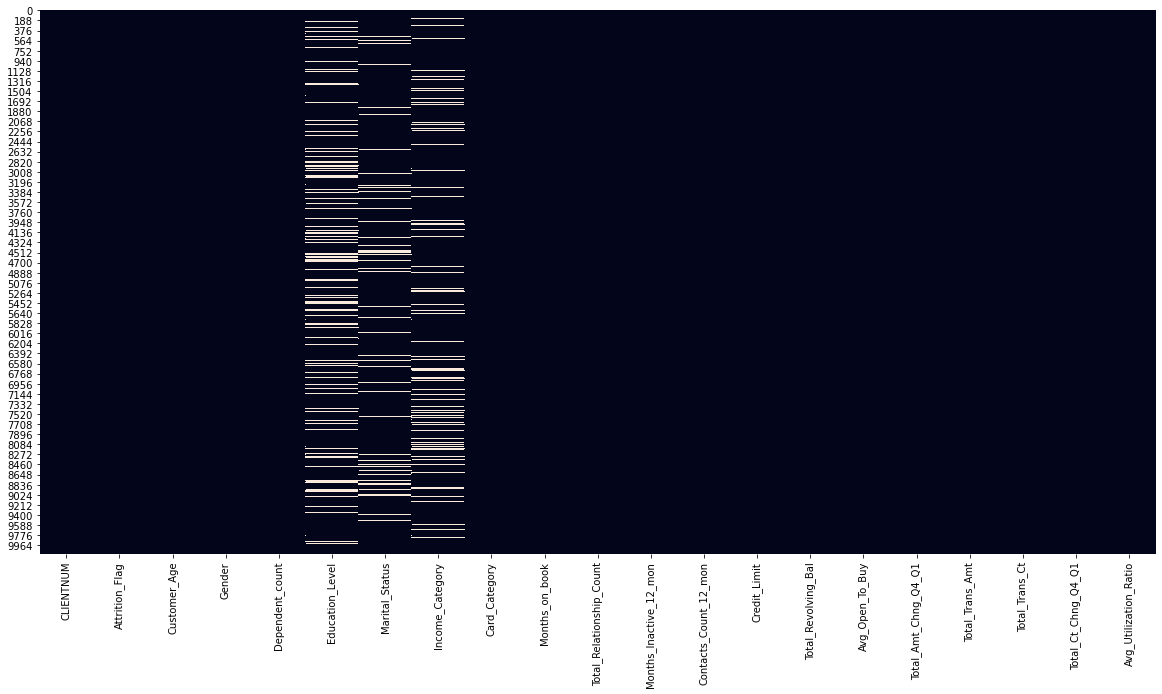

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

Trois colonnes de notre dataset comportent des valeurs manquantes avec de faibles proportions autours de 10% par colonne. 

In [17]:
(df['Attrition_Flag'].value_counts(normalize = True ))*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Parmi les clients de la banque, 16% ont quitté leurs services de carte de crédit

In [25]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Visualisation des variables quantitatives

<Figure size 432x288 with 0 Axes>

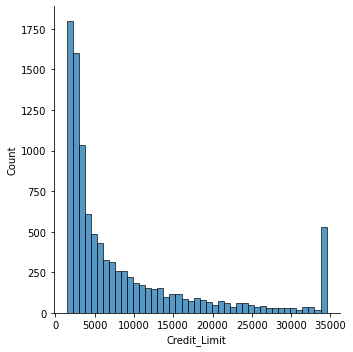

<Figure size 432x288 with 0 Axes>

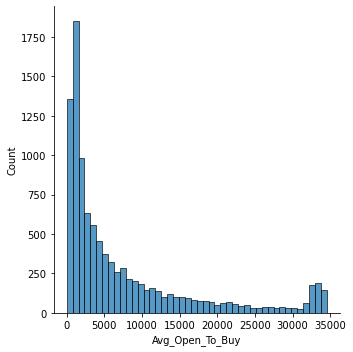

<Figure size 432x288 with 0 Axes>

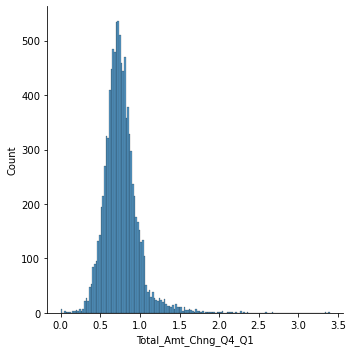

<Figure size 432x288 with 0 Axes>

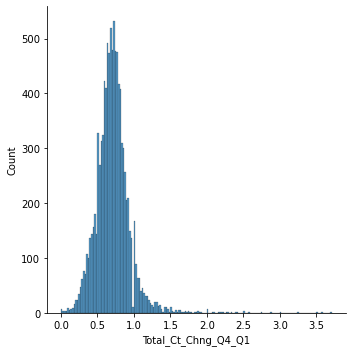

<Figure size 432x288 with 0 Axes>

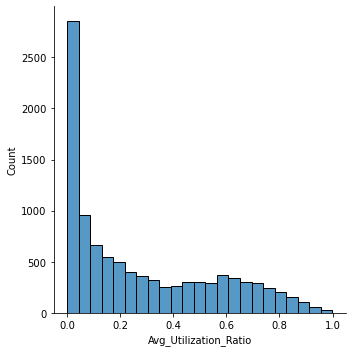

In [27]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

<Figure size 432x288 with 0 Axes>

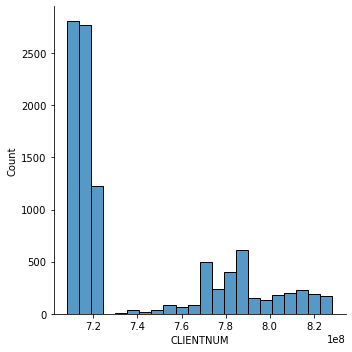

<Figure size 432x288 with 0 Axes>

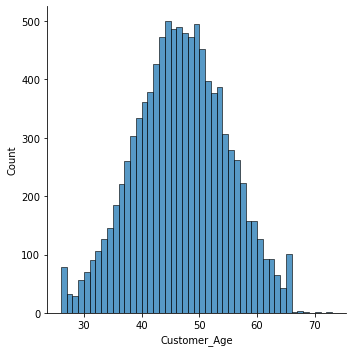

<Figure size 432x288 with 0 Axes>

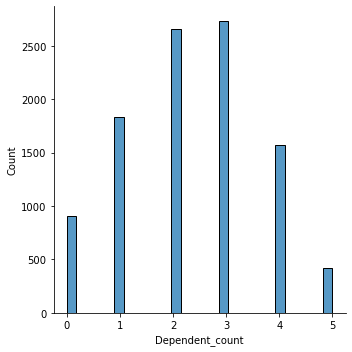

<Figure size 432x288 with 0 Axes>

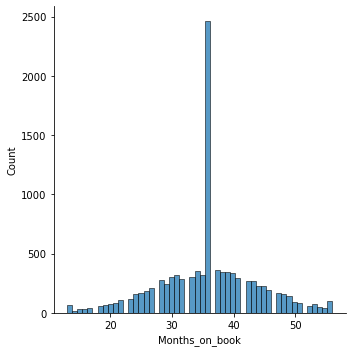

<Figure size 432x288 with 0 Axes>

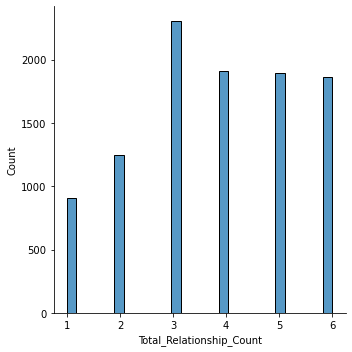

<Figure size 432x288 with 0 Axes>

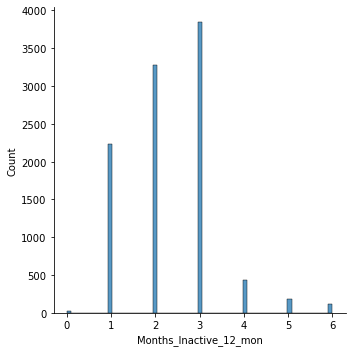

<Figure size 432x288 with 0 Axes>

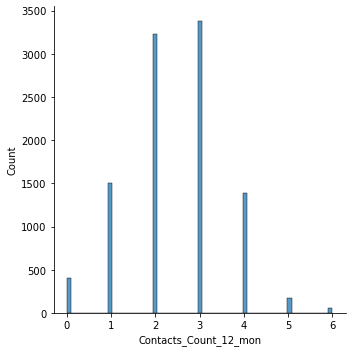

<Figure size 432x288 with 0 Axes>

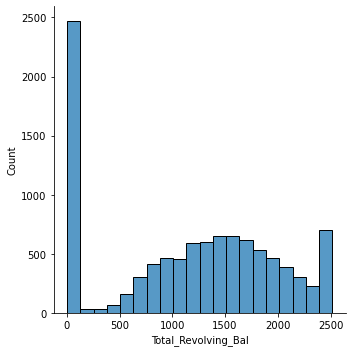

<Figure size 432x288 with 0 Axes>

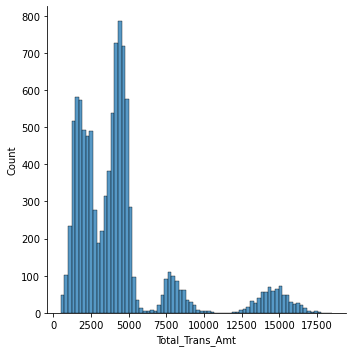

<Figure size 432x288 with 0 Axes>

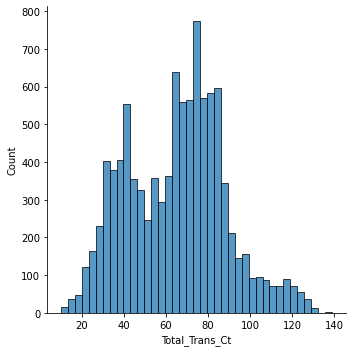

In [42]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.displot(df[col])

# Carte de correlation des variables quantitative


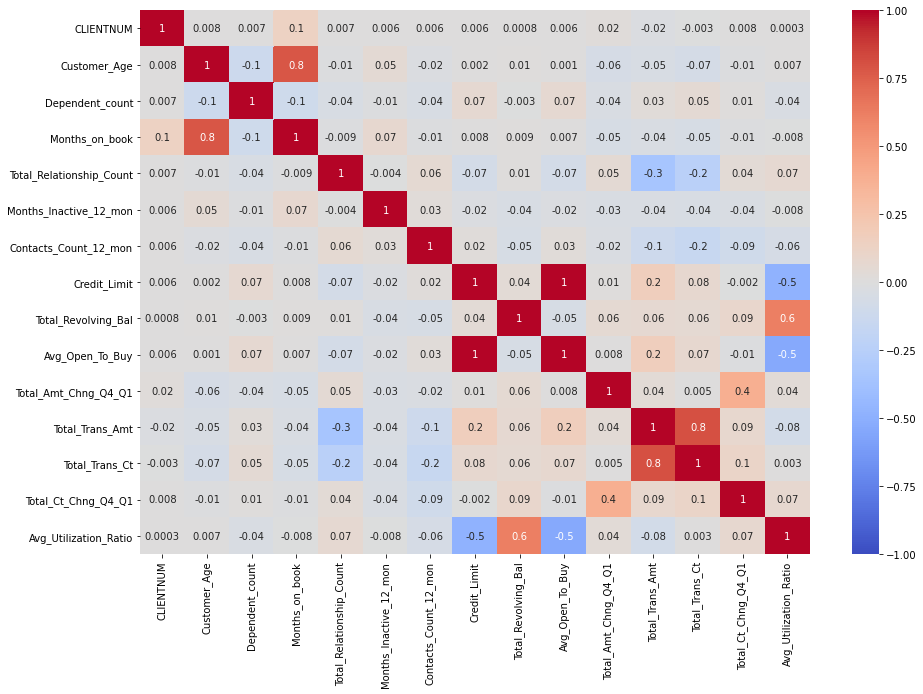

In [58]:
fig = plt.figure(figsize = (15,10))  # 15: width, 10: height
ax = fig.add_subplot(111)
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax = ax, fmt = '.1g');

In [ ]:
sns.scatterplot(x = 'Total_Revolving_Bal', y = 'Avg_Utilization_Ratio', data = df)

# visualisation des variables qualitatives

In [29]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Attrition_Flag------------------------------------ ['Existing Customer' 'Attrited Customer']
Gender-------------------------------------------- ['M' 'F']
Education_Level----------------------------------- ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status------------------------------------ ['Married' 'Single' nan 'Divorced']
Income_Category----------------------------------- ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan]
Card_Category------------------------------------- ['Blue' 'Gold' 'Silver' 'Platinum']


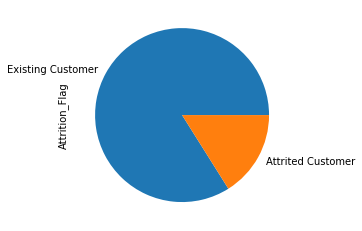

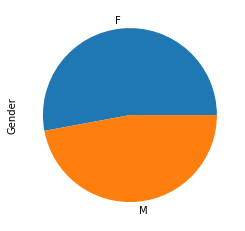

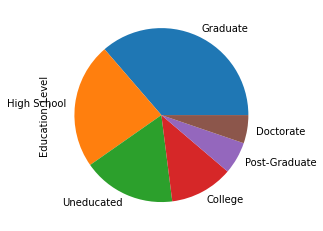

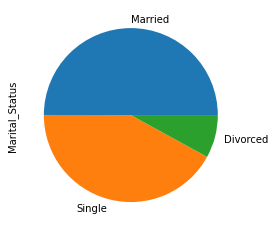

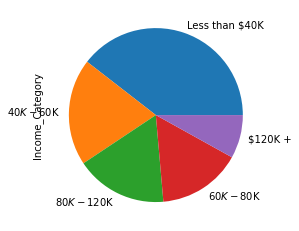

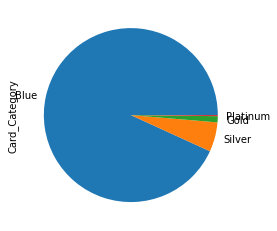

In [34]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

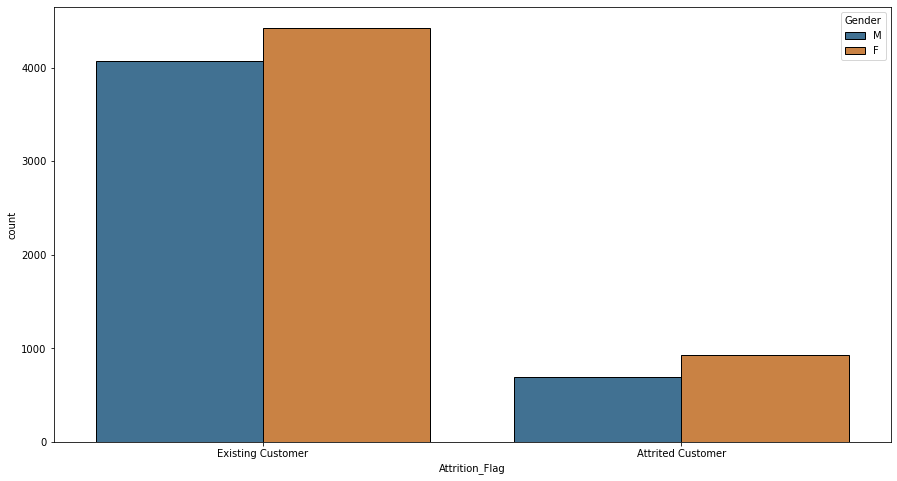

In [48]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Attrition_Flag'], hue = df['Gender'], edgecolor = 'black', saturation = 0.55)
plt.show()

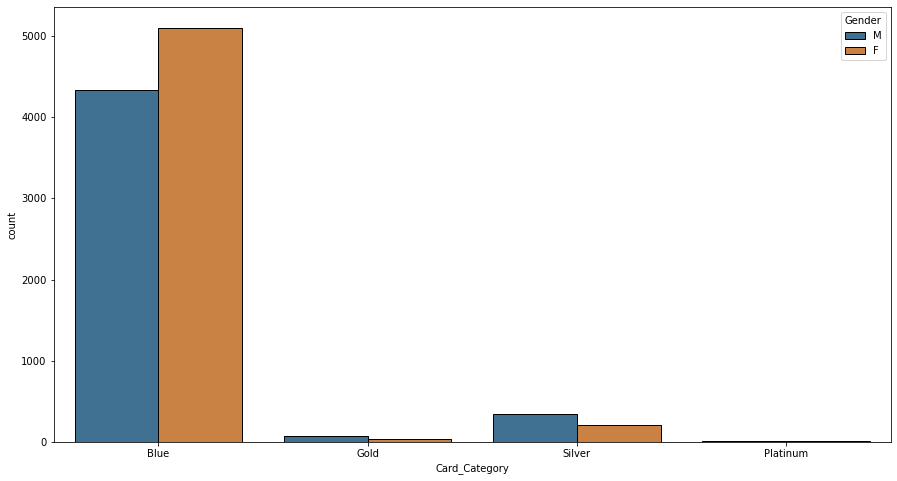

In [45]:
plt.figure(figsize = (15, 8))
sns.countplot(x = df['Card_Category'], hue = df['Gender'], edgecolor = 'black', saturation = 0.55)
plt.show()


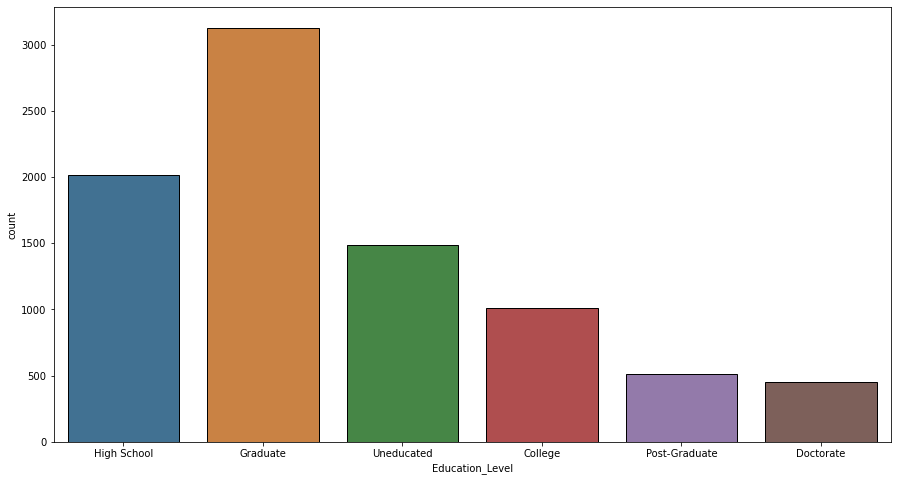

In [38]:
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

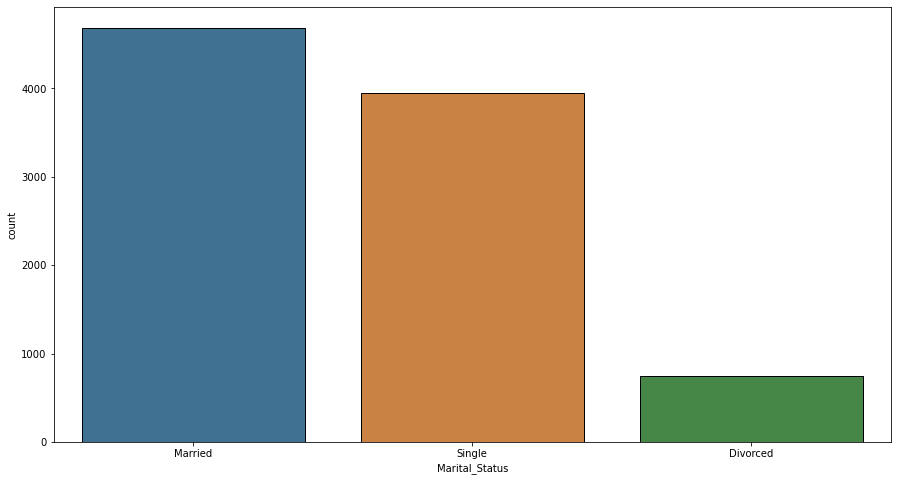

In [39]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

In [ ]:
# plt.figure(figsize = (15,8))
sns.countplot(x = df['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

# Influence des variables quantitaves sur la variable cible

In [78]:
df.drop('CLIENTNUM', axis = 1).head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


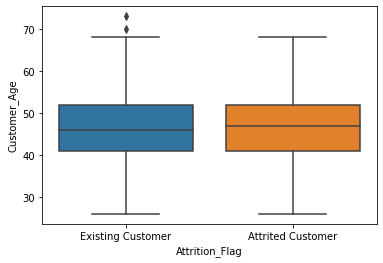

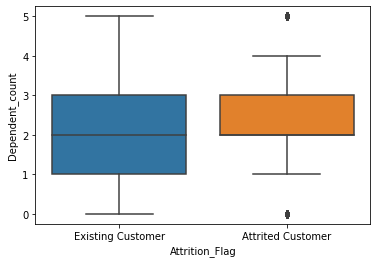

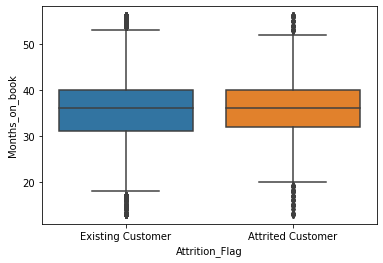

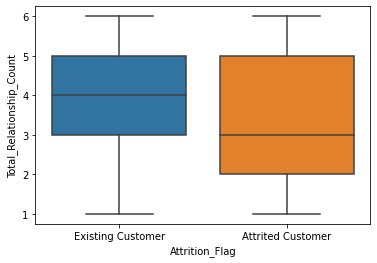

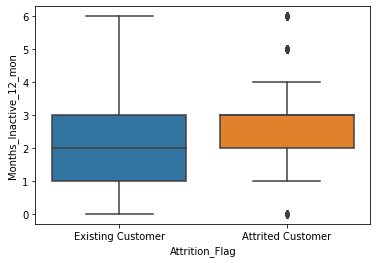

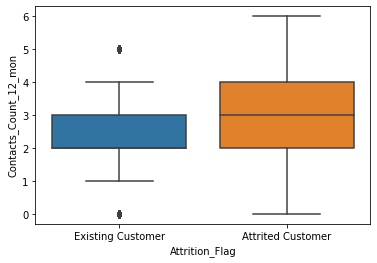

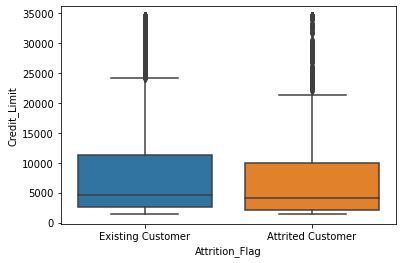

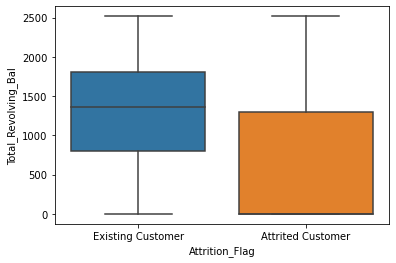

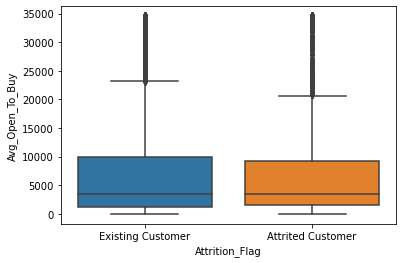

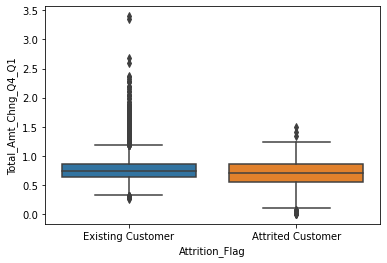

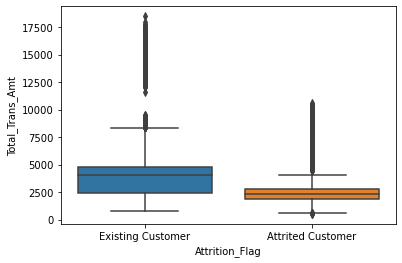

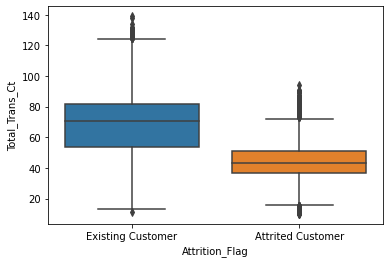

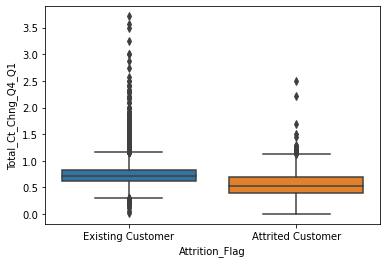

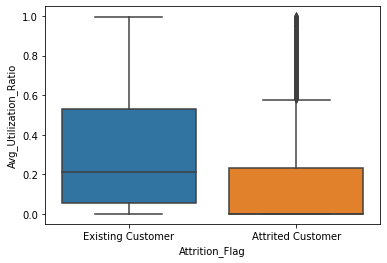

In [86]:
for col in df.select_dtypes(exclude = 'object').drop('CLIENTNUM', axis = 1):
    plt.figure()
    sns.boxplot(y = col, x = 'Attrition_Flag',data = df)
     

In [ ]:
# 

In [ ]:
for col in df.select_dtypes(exclude = 'object').drop('CLIENTNUM', axis = 1):
    plt.figure()
    sns.boxplot(y = col, x = 'Attrition_Flag',data = df)
     

La carte de corrélation linéaires des variables n'indique pas de corrélation significatif entre les variables quantitatives prises deux à deux.

# TrainTest - Nettoyage - Encodage


In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

#### La proportion des classes dans le jeu de données

In [ ]:
trainset['Attrition_Flag'].value_counts()

In [ ]:
testset['Attrition_Flag'].value_counts()

### Fonction de transformation

In [ ]:
lbe = LabelEncoder()

cat_cols = [x for x in df.columns if df[x].dtype == 'object']

for c in cat_cols:
    df.loc[:, c] = lbe.fit_transform(df.loc[:, c])

In [ ]:
df.select_dtypes('object').columns

In [ ]:
def encodage(df):
    code =  {
        'Existing Customer': 0,
        'Attrited Customer': 1,
        'M': 1,
        'F': 0,
        'Uneducated': 0,
        'College': 1,
        'High School': 2,
        'Graduate': 3,
        'Post-Graduate': 4,
        'Doctorate': 5,
        'Single':0,
        'Married': 1,
        'Divorced':2,
        'Less than $40K': 0,
        '$40K - $60K': 1,
        '$60K - $80K': 2,
        '$80K - $120K': 3,
        '$120K +': 4,
        'Blue': 0,
        'Silver': 1,
        'Gold': 2,
        'Platinum': 3
    }
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [ ]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [ ]:
# def standardisation(df):
#     sc = StandardScaler()
#     df[list(df.select_dtypes(exclude = object))] =sc.fit_transform(df.select_dtypes(exclude = object))
#     return df

In [ ]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    #df = standardisation(df)
    
    X = df.drop(['CLIENTNUM','Attrition_Flag'], axis=1)
    y = df['Attrition_Flag']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)

In [ ]:
X_test, y_test = preprocessing(testset)

# Modellisation

In [ ]:
model_1 = RandomForestClassifier(random_state=0)

In [ ]:
model_2 = LogisticRegression(random_state = 0,solver='liblinear')

In [ ]:
model_3 = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [ ]:
evaluation(model_1)

In [ ]:
evaluation(model_2)

In [ ]:
evaluation(model_3)